<a href="https://colab.research.google.com/github/NoobBeginnerReal/credit-risk-analysis/blob/main/Credit_Risk_Analysis_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

## INITIAL EDA

In [76]:
import pandas as pd

df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.000000,PERSONAL,D,35000,16.020000,1,0.590000,Y,3
1,21,9600,OWN,5.000000,EDUCATION,B,1000,11.140000,0,0.100000,N,2
2,25,9600,MORTGAGE,1.000000,MEDICAL,C,5500,12.870000,1,0.570000,N,3
3,23,65500,RENT,4.000000,MEDICAL,C,35000,15.230000,1,0.530000,N,2
4,24,54400,RENT,8.000000,MEDICAL,C,35000,14.270000,1,0.550000,Y,4


explore the data and these relationships more with further analysis to understand the impact of the data on credit loan defaults.

Checking the structure of the data as well as seeing a snapshot helps us better understand what's inside the set. Similarly, visualizations provide a high level view of the data in addition to important trends and patterns.

In [77]:
df.dtypes

,0
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


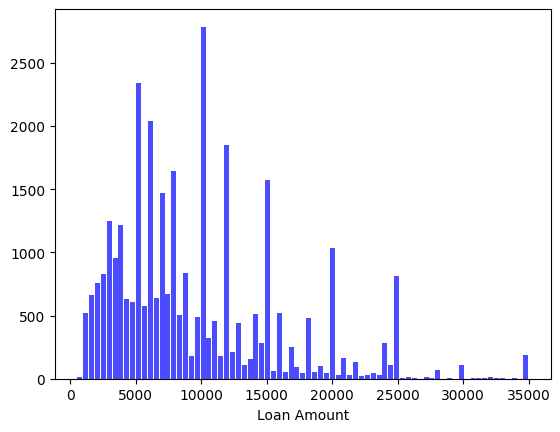

In [78]:
# Plot the distribution of loan amounts with histogram
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(x=df['loan_amnt'],
                            bins='auto',
                            color='blue',
                            alpha=0.7,
                            rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

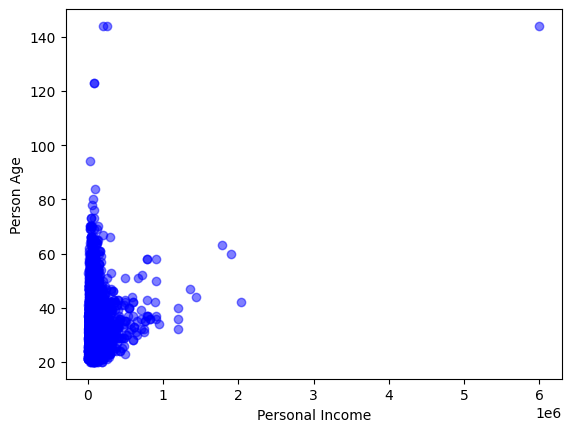

In [79]:
# Plot a scatter plot of income against age
plt.scatter(df['person_income'],
            df['person_age'],
            c='blue',
            alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Person Age')
plt.show()

We can already see a positive correlation with age and income, which could mean these older recipients are further along in their career and therefore earn higher salaries. There also appears to be an outlier in the data

Often, financial data is viewed as a pivot table in spreadsheets like Excel.

With cross tables, you get a high level view of selected columns and even aggregation like a count or average. For most credit risk models, especially for probability of default, columns like person_emp_length and person_home_ownership are common to begin investigating.

You will be able to see how the values are populated throughout the data, and visualize them. For now, you need to check how loan_status is affected by factors like home ownership status, loan grade, and loan percentage of income.

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581
loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                  

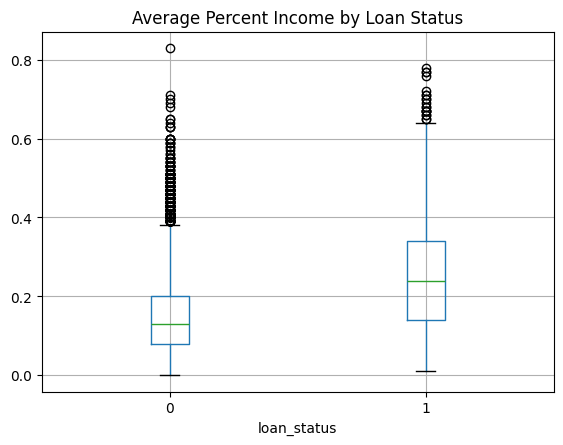

In [80]:
# Create a cross table of the loan intent and status
print(pd.crosstab(df['loan_intent'],
                  df['loan_status'],
                  margins = True))
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(df['person_home_ownership'],
                  [df['loan_status'],
                   df['loan_grade']]))
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(df['person_home_ownership'],
                  df['loan_status'],
                  values=df['loan_percent_income'],
                  aggfunc='mean'))
# Create a box plot of percentage income by loan status
df.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

Loan intent vs. loan status:
- Debt consolidation and medical loans have high default counts
- venture loans have the lowest defaul count but might have higher risk profile
- education have a relatively low default rate

Default appears more frequent in renters

Loan percent income:
- Defaults (1) tend to have a higher loan percent of income, meaning borrowers committing a higher proportion of their income to loan payments are more likely to default. => showing a strong correlation between high debt burden and default risk
- The spread from the box plot is also larger, suggesting varying financial pressures leading to defaults

It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.

find and remove outliers

It may not be possible for a person to have an employment length of less than 0 or greater than 60


In [81]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(df['loan_status'],
                  df['person_home_ownership'],
                  values=df['person_emp_length'],
                  aggfunc='max'))

person_home_ownership   MORTGAGE     OTHER       OWN       RENT
loan_status                                                    
0                     123.000000 24.000000 31.000000  41.000000
1                      34.000000 11.000000 17.000000 123.000000


123 years of employment? :D  
Renters have max employment length of 41 years

In [82]:
# Create an array of indices where employment length is greater than 60
indices = df[df['person_emp_length'] > 60].index
print(indices)
df_new = df.drop(indices, axis=0)

Index([0, 210], dtype='int64')


In [83]:
# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(df_new['loan_status'],
                  df_new['person_home_ownership'],
                  values=df_new['person_emp_length'],
                  aggfunc=['min','max']))

                           min                                  max            \
person_home_ownership MORTGAGE    OTHER      OWN     RENT  MORTGAGE     OTHER   
loan_status                                                                     
0                     0.000000 0.000000 0.000000 0.000000 38.000000 24.000000   
1                     0.000000 0.000000 0.000000 0.000000 34.000000 11.000000   

                                           
person_home_ownership       OWN      RENT  
loan_status                                
0                     31.000000 41.000000  
1                     17.000000 27.000000  


Defaulters tend to have lower employment length across all home ownership types, reinforcing that job stability might play a role in loan repayment ability.

Renters and those with lower employment length may be at higher risk of default, but further statistical analysis is needed to confirm.

discovered outliers in person_emp_length where values greater than 60 were far above the norm. person_age is another column in which a person can use a common sense approach to say it is very unlikely that a person applying for a loan will be over 100 years old.

Visualizing the data here can be another easy way to detect outliers. other numeric columns like loan_amnt and loan_int_rate to create plots with person_age to search for outliers.

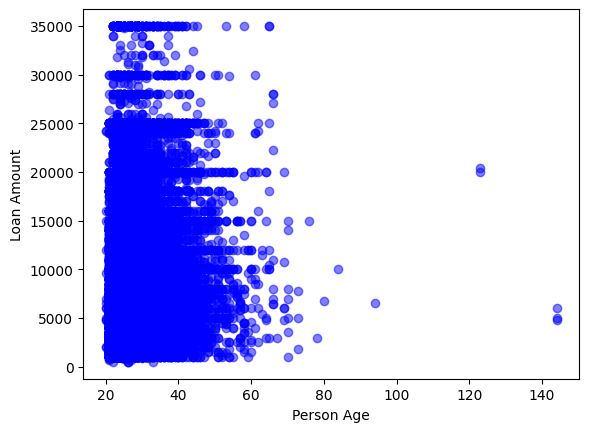

In [84]:
# Create the scatter plot for age and amount
plt.scatter(df['person_age'],
            df['loan_amnt'],
            c='blue',
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

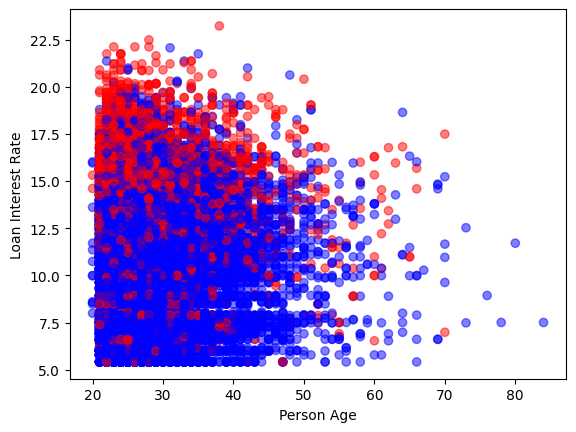

In [85]:
import matplotlib
# Use Pandas to drop the record from the data frame and create a new one
df_new = df.drop(df[df['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(df_new['person_age'], df_new['loan_int_rate'],
            c = df_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

You really .drop() those rows like they're hot! Notice that in the last plot we have loan_status as a label for colors. This shows a different color depending on the class. In this case, it's loan default and non-default, and it looks like there are more defaults with high interest rates.

# Risk with missing data in loan data

# Handling missing

In [86]:
# Print an array of columns with null values
print(df.columns[df.isnull().any()])

Index(['person_emp_length', 'loan_int_rate'], dtype='object')


In [87]:
# Print the top five rows with nulls for employment length
print(df[df['person_emp_length'].isnull()].head())

# Replace the null values with the median value for all employment lengths
df['person_emp_length'].fillna((df['person_emp_length'].median()), inplace=True)

     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000       5.420000            1   
222          EDUCATION          B      35000      12.420000            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000      10.740000            1   
408          EDUCATION          C       2250      15.270000            0   

     loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
105        

<ipython-input-87-bb3788b9d7d7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna((df['person_emp_length'].median()), inplace=True)


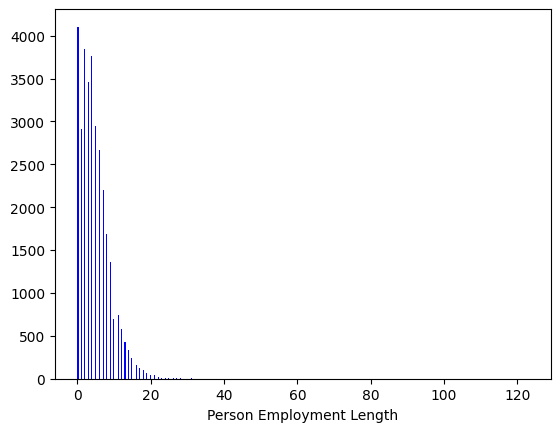

3116


,count
person_home_ownership,
RENT,16446
MORTGAGE,13444
OWN,2584
OTHER,107


In [88]:
# Create a histogram of employment length
n, bins, patches = plt.hist(df['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()
# Print the number of nulls
print(df['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = df[df['loan_int_rate'].isnull()].index

# Save the new data without missing data
df_clean = df.drop(indices)
# Count the number of records for each unique value
df['person_home_ownership'].value_counts()

The goal here is to keep as much of our data as we can! It's also important to check the distribution of that feature to see if it changed.

ow that the missing data and outliers have been processed, the data is ready for modeling! More often than not, financial data is fairly tidy, but it's always good to practice preparing data for analytical work

In [89]:
df_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.000000,PERSONAL,D,35000,16.020000,1,0.590000,Y,3
1,21,9600,OWN,5.000000,EDUCATION,B,1000,11.140000,0,0.100000,N,2
2,25,9600,MORTGAGE,1.000000,MEDICAL,C,5500,12.870000,1,0.570000,N,3
3,23,65500,RENT,4.000000,MEDICAL,C,35000,15.230000,1,0.530000,N,2
4,24,54400,RENT,8.000000,MEDICAL,C,35000,14.270000,1,0.550000,Y,4


Encoding non numeric data

In [90]:
# Create two data sets for numeric and non-numeric data
cred_num = df_clean.select_dtypes(exclude=['object'])
cred_str = df_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
df_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(df_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [91]:
df_prep.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.000000,35000,16.020000,1,0.590000,3,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.000000,1000,11.140000,0,0.100000,2,False,False,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.000000,5500,12.870000,1,0.570000,3,True,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.000000,35000,15.230000,1,0.530000,2,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.000000,35000,14.270000,1,0.550000,4,False,False,...,False,False,False,True,False,False,False,False,False,True


# Plug into Logistics Regression

Accuracy: 0.80
Precision: 0.54
Recall: 0.77
F1 Score: 0.64


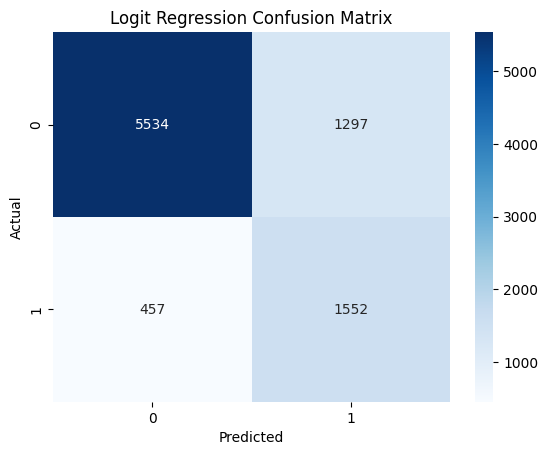

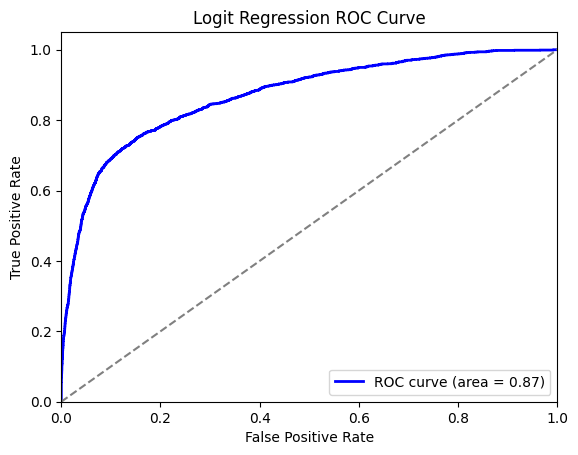

AUC: 0.87
Cross Entropy (Log Loss): 0.44
Sensitivity (Recall): 0.77
Specificity: 0.81
True Positives (TP): 1552
False Positives (FP): 1297
True Negatives (TN): 5534
False Negatives (FN): 457


In [92]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, log_loss
from sklearn.preprocessing import StandardScaler

df = df_prep

X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression
logit_model = LogisticRegression(class_weight = 'balanced',
                                 random_state=42,
                                 max_iter=10000,
                                 solver='newton-cg')
logit_model.fit(X_train, y_train)

# Predict
y_pred = logit_model.predict(X_test)
y_pred_proba = logit_model.predict_proba(X_test)[:, 1]

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logit Regression Confusion Matrix')
plt.show()

# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logit Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()
print(f"AUC: {auc:.2f}")

# Calculate Cross Entropy (Log Loss)
cross_entropy = log_loss(y_test, y_pred_proba)
print(f"Cross Entropy (Log Loss): {cross_entropy:.2f}")

# Calculate Sensitivity (Recall) and Specificity
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
# Print values
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")


Top 10 Most Important Features (Logistic Regression):
                       Feature  Importance  Abs_Importance
5          loan_percent_income    1.393216        1.393216
3                    loan_amnt   -0.678210        0.678210
20                loan_grade_D    0.524218        0.524218
9    person_home_ownership_OWN   -0.504825        0.504825
4                loan_int_rate    0.384353        0.384353
21                loan_grade_E    0.316034        0.316034
10  person_home_ownership_RENT    0.288634        0.288634
16         loan_intent_VENTURE   -0.278792        0.278792
23                loan_grade_G    0.241844        0.241844
17                loan_grade_A   -0.231019        0.231019


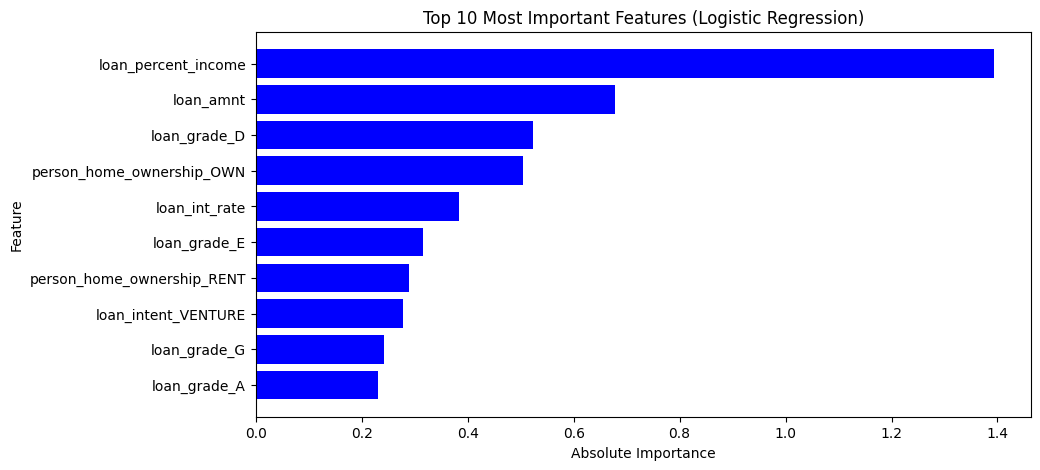

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.6f}'.format  # Display numbers with 6 decimal places

# Extract feature importance (logistic regression coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': logit_model.coef_[0]  # Extract coefficients
})

# Sort by absolute importance
feature_importance['Abs_Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Importance', ascending=False)

# Print Top 10 Most Important Features
print("\nTop 10 Most Important Features (Logistic Regression):")
print(feature_importance.head(10))

# Plot Feature Importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Feature'][:10], feature_importance['Abs_Importance'][:10], color='blue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel("Absolute Importance")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features (Logistic Regression)")
plt.show()


In [94]:
# Extract predicted probabilities from the trained model
test_pred_df = pd.DataFrame({
    'prob_default': logit_model.predict_proba(X_test)[:, 1],  # Probability of default (XGBoost output)
    'true_loan_status': y_test.values,  # Actual loan outcome (0 = good, 1 = default)
    'loan_amnt': df.loc[y_test.index, 'loan_amnt'].values
})

In [95]:
test_pred_df.head()

,prob_default,true_loan_status,loan_amnt
0,0.662601,0,17400
1,0.227249,0,3600
2,0.614918,0,9000
3,0.078225,0,1000
4,0.241572,0,5000


In [96]:
# 📌 1️⃣ Check statistics of probabilities of default
print("Default Probability Statistics:")
print(test_pred_df['prob_default'].describe())

# 📌 2️⃣ Calculate the threshold for an 85% acceptance rate
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

# Apply threshold: Loans with default probability below threshold are accepted (loan_status = 0)
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Check new loan status distribution
print("\nLoan Status Distribution After Applying 85% Acceptance Rate Threshold:")
print(test_pred_df['pred_loan_status'].value_counts())

Default Probability Statistics:
count   8840.000000
mean       0.384829
std        0.300631
min        0.000774
25%        0.127477
50%        0.289880
75%        0.614725
max        0.999737
Name: prob_default, dtype: float64

Loan Status Distribution After Applying 85% Acceptance Rate Threshold:
pred_loan_status
0    7514
1    1326
Name: count, dtype: int64


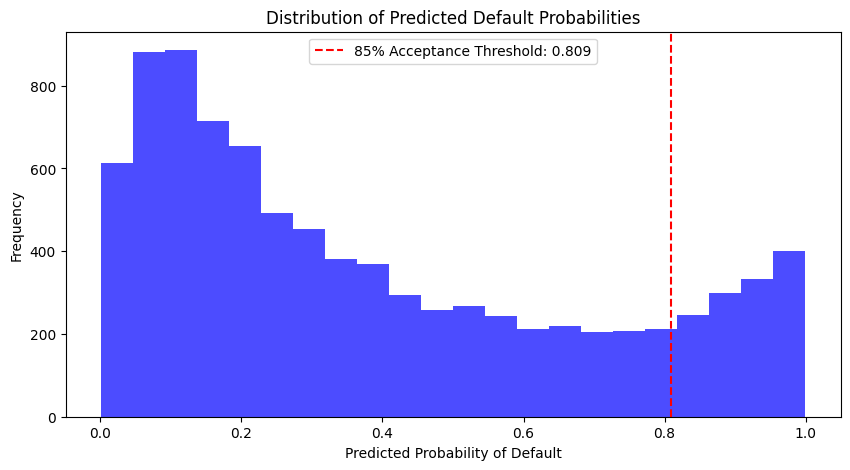

In [112]:
# 📌 3️⃣ Visualizing acceptance quantiles
plt.figure(figsize=(10,5))
plt.hist(test_pred_df['prob_default'], bins='auto', color='blue', alpha=0.7)
plt.axvline(x=threshold_85, color='red', linestyle='dashed', label=f'85% Acceptance Threshold: {threshold_85:.3f}')
plt.xlabel("Predicted Probability of Default")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Default Probabilities")
plt.legend()
plt.show()

In [98]:
# Print the top 5 rows of the new data frame
print(test_pred_df.head())

   prob_default  true_loan_status  loan_amnt  pred_loan_status
0      0.662601                 0      17400                 0
1      0.227249                 0       3600                 0
2      0.614918                 0       9000                 0
3      0.078225                 0       1000                 0
4      0.241572                 0       5000                 0


In [99]:
# 📌 4️⃣ Bad Rate Calculation
# Subset only accepted loans (pred_loan_status == 0)
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

# Compute the bad rate: % of accepted loans that defaulted
bad_rate = np.sum(accepted_loans['true_loan_status']) / len(accepted_loans['true_loan_status'])

print(f"\nBad Rate (Accepted Loans that Defaulted): {bad_rate:.2%}")


Bad Rate (Accepted Loans that Defaulted): 12.88%


In [100]:
# Print the statistics of the loan amount column
print(test_pred_df['loan_amnt'].describe())

count    8840.000000
mean     9552.539593
std      6265.100091
min       500.000000
25%      5000.000000
50%      8000.000000
75%     12000.000000
max     35000.000000
Name: loan_amnt, dtype: float64


In [101]:
# 📌 5️⃣ Impact of Acceptance Rates on Loan Amounts
print("\nLoan Amount Statistics:")
print(test_pred_df['loan_amnt'].describe())

# Compute average loan amount
avg_loan = np.mean(test_pred_df['loan_amnt'])

# Cross-tabulation of true vs predicted loan status impact
pd.options.display.float_format = '${:,.2f}'.format
impact_table = pd.crosstab(test_pred_df['true_loan_status'], test_pred_df['pred_loan_status']).apply(lambda x: x * avg_loan, axis=0)

print("\nImpact of Acceptance Rates on Total Loan Amounts:")
print(impact_table)


Loan Amount Statistics:
count    8840.000000
mean     9552.539593
std      6265.100091
min       500.000000
25%      5000.000000
50%      8000.000000
75%     12000.000000
max     35000.000000
Name: loan_amnt, dtype: float64

Impact of Acceptance Rates on Total Loan Amounts:
pred_loan_status              0             1
true_loan_status                             
0                $62,530,924.17 $2,722,473.78
1                 $9,246,858.33 $9,944,193.72


In [102]:
# 📌 6️⃣ Credit Strategy Table: Acceptance Rates, Thresholds, Bad Rates
pd.options.display.float_format = '{:.6f}'.format
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]  # Acceptance rates to evaluate
thresholds, bad_rates = [], []

for rate in accept_rates:
    # Calculate threshold
    thresh = np.quantile(test_pred_df['prob_default'], rate).round(3)
    thresholds.append(thresh)

    # Assign new predicted loan status
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)

    # Compute bad rate for this threshold
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    bad_rate = np.sum(accepted_loans['true_loan_status']) / len(accepted_loans['true_loan_status'])
    bad_rates.append(round(bad_rate, 3))

# Create strategy DataFrame
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates), columns=['Acceptance Rate', 'Threshold', 'Bad Rate'])

print("\nCredit Strategy Table:")
print(strat_df)


Credit Strategy Table:
    Acceptance Rate  Threshold  Bad Rate
0          1.000000   1.000000  0.227000
1          0.950000   0.948000  0.192000
2          0.900000   0.886000  0.160000
3          0.850000   0.809000  0.129000
4          0.800000   0.713000  0.103000
5          0.750000   0.615000  0.088000
6          0.700000   0.533000  0.078000
7          0.650000   0.457000  0.072000
8          0.600000   0.393000  0.066000
9          0.550000   0.336000  0.061000
10         0.500000   0.290000  0.054000
11         0.450000   0.248000  0.048000
12         0.400000   0.212000  0.044000
13         0.350000   0.182000  0.039000
14         0.300000   0.155000  0.035000
15         0.250000   0.127000  0.031000
16         0.200000   0.105000  0.025000
17         0.150000   0.084000  0.017000
18         0.100000   0.061000  0.007000
19         0.050000   0.037000  0.007000


<Axes: >

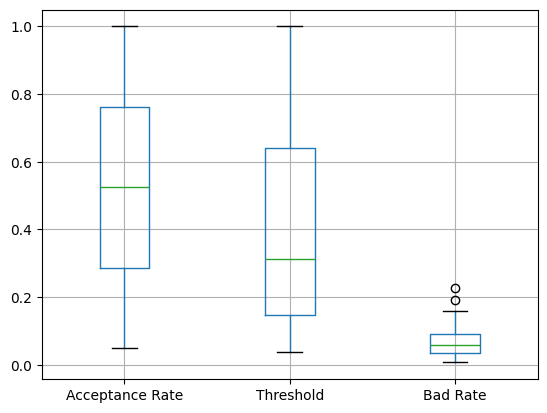

In [103]:
strat_df.boxplot()

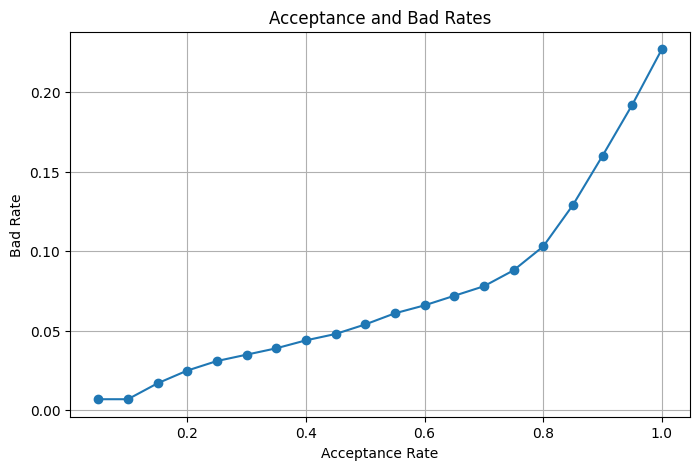

In [104]:
# 📌 7️⃣ Strategy Curve Visualization
plt.figure(figsize=(8,5))
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'], marker='o', linestyle='-')
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.grid(True)
plt.show()

In [105]:
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate
0          1.000000   1.000000  0.227000
1          0.950000   0.948000  0.192000
2          0.900000   0.886000  0.160000
3          0.850000   0.809000  0.129000
4          0.800000   0.713000  0.103000
5          0.750000   0.615000  0.088000
6          0.700000   0.533000  0.078000
7          0.650000   0.457000  0.072000
8          0.600000   0.393000  0.066000
9          0.550000   0.336000  0.061000
10         0.500000   0.290000  0.054000
11         0.450000   0.248000  0.048000
12         0.400000   0.212000  0.044000
13         0.350000   0.182000  0.039000
14         0.300000   0.155000  0.035000
15         0.250000   0.127000  0.031000
16         0.200000   0.105000  0.025000
17         0.150000   0.084000  0.017000
18         0.100000   0.061000  0.007000
19         0.050000   0.037000  0.007000


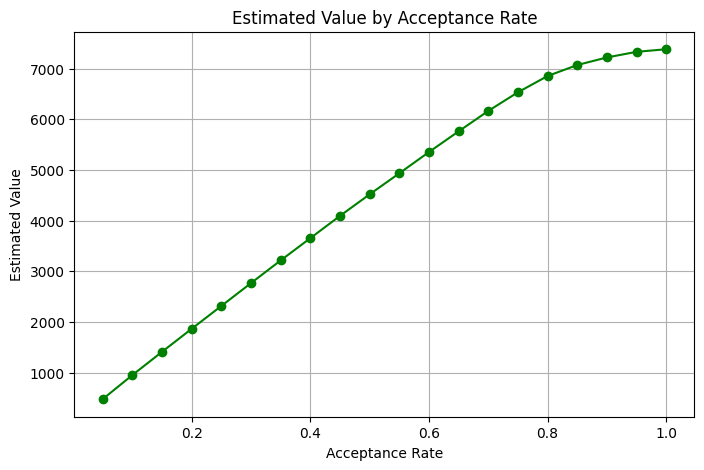

In [106]:
# 📌 8️⃣ Estimated Value Profiling
# (Assuming estimated value is computed using a function based on acceptance rate)
# You may need to define the actual function based on business rules
strat_df['Estimated Value'] = strat_df['Acceptance Rate'] * (1 - strat_df['Bad Rate']) * avg_loan

# Plot Estimated Value by Acceptance Rate
plt.figure(figsize=(8,5))
plt.plot(strat_df['Acceptance Rate'], strat_df['Estimated Value'], marker='o', linestyle='-', color='green')
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.grid(True)
plt.show()


In [107]:
print(strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])])

   Acceptance Rate  Threshold  Bad Rate  Estimated Value
0         1.000000   1.000000  0.227000      7384.113105


In [108]:
# Assign LGD as 1 (100% loss in case of default)
test_pred_df['loss_given_default'] = 1.0

In [109]:
# 📌 9️⃣ Total Expected Loss Calculation
# Compute expected loss for each loan: Probability of Default * Loan Amount * Loss Given Default
test_pred_df['expected_loss'] = test_pred_df['prob_default'] * test_pred_df['loan_amnt'] * test_pred_df['loss_given_default']

# Compute total expected loss
total_expected_loss = round(np.sum(test_pred_df['expected_loss']), 2)

print(f"\nTotal Expected Loss (XGB): ${total_expected_loss:,.2f}")


Total Expected Loss (XGB): $34,861,999.36
